# Evolución de la enfermedad en un entorno controlado

A continuación nos situaremos en un escenario un poco más realista. Supongamos que se descubre el inicio de un brote de gripa en el hospital de un pueblo con 49 personas y deseamos analizar el comportamiento de la enfermedad para establecer medidas de control para variaciones futuras de la misma gripa.

En el pueblo podemos identificar cinco lugares diferentes en donde las células interactuan entre si: La escuela, las oficinas, el mercado, el hospital y las viviendas de cada persona. Asumiremos que en la población se realizó un senso y tenemos acceso a las edades de cada individuo, su lugar de trabajo (o donde pasan la mayor parte del tiempo) y las personas con las que viven. Distribuyendose de la siguiente manera:

* Escuela (E): Se sabe que en el pueblo hay 9 niños y 2 profesores.
* Oficinas (O): Cuenta con un personal de 16 individuos.
* Mercado (M): Se identificaron 8 trabajadores.
* Hospital (H): Entre doctores, enfermeros y pacientes se identifica una cantidad de 14 individuos.

Supondremos que todos los niños del pueblo son hijos únicos y que las viviendas con tres individuos cuentan con al menos un niño. Además de esto y de acuerdo con la información anterior supondremos que en el pueblo la población vive en uno de tres tipos de vivienda: la vivienda C1 en donde vive una sola persona y que se asume además que es un adulto; las viviendas C2 en donde viven dos individuos, ya sean dos adultos o un adulto y un niño; y por úlitmo las viviendas C3, en donde viven 3 personas.

De aacuerdo con lo mencionado en el capítulo anterior, debemos establecer los grados de impacto de acuerdo con la manera en la que se distribuye nuestra población. En nuestro caso asumiremos que las personas que viven juntas tienen una grado de impacto cero entre ellas, que con los que tienen contacto en el lugar de ocupación tienen un grado de impacto igual a uno y que con las demás células tienen grado de impacto dos. De ese modo, si organizamos a la población sobre una malla identificando sus edades, ocupaciones y vecindades obtendremos algo como lo que se ve en la siguiente figura:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

from EpidemiologicalModels.epidemiologicalModelsInCA import *

In [2]:
x00 = [[0,0],np.array([[0,1,1,1,1,1,2],[1,2,1,1,1,1,2],[1,2,1,2,1,1,1],[2,2,2,1,1,1,1],[2,2,2,2,1,1,1],[1,2,2,2,2,1,1],[1,2,2,1,1,1,1]])]
x01 = [[0,1],np.array([[1,0,0,1,1,1,2],[1,2,1,1,1,1,1],[1,2,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x02 = [[0,2],np.array([[1,0,0,1,1,1,2],[1,2,1,1,1,1,1],[1,2,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x03 = [[0,3],np.array([[1,1,1,0,1,1,2],[1,2,1,0,1,1,1],[1,2,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x04 = [[0,4],np.array([[1,1,1,1,0,0,1],[1,1,1,1,1,0,2],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,2,2,1,1],[1,2,1,1,1,1,1]])]
x05 = [[0,5],np.array([[1,1,1,1,0,0,1],[1,1,1,1,1,0,2],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,2,2,1,1],[1,2,1,1,1,1,1]])]
x06 = [[0,6],np.array([[2,2,2,2,1,1,0],[2,1,2,2,2,1,2],[2,1,2,2,2,1,2],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,2,2,1,1],[2,2,1,1,1,1,1]])]

x10 = [[1,0],np.array([[1,1,1,1,1,1,2],[0,2,1,1,1,1,1],[0,2,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x11 = [[1,1],np.array([[2,2,2,2,1,1,1],[2,0,2,2,2,1,2],[2,0,2,1,2,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,2,1,1],[1,2,1,1,1,1,1]])]
x12 = [[1,2],np.array([[1,1,1,1,1,1,2],[1,2,0,1,1,1,2],[1,2,1,2,1,1,1],[2,2,2,1,1,1,1],[2,2,2,2,1,1,1],[1,2,2,2,2,1,1],[1,2,2,1,1,1,1]])]
x13 = [[1,3],np.array([[1,1,1,0,1,1,2],[1,2,1,0,1,1,1],[1,2,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x14 = [[1,4],np.array([[1,1,1,1,1,1,2],[1,2,1,1,0,1,1],[1,2,1,2,0,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x15 = [[1,5],np.array([[1,1,1,1,0,0,1],[1,1,1,1,1,0,2],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,2,2,1,1],[1,2,1,1,1,1,1]])]
x16 = [[1,6],np.array([[2,1,1,1,2,2,2],[1,2,2,1,1,2,0],[1,2,2,2,1,2,2],[2,1,1,1,1,1,2],[1,1,1,2,1,1,2],[2,1,1,1,1,1,2],[2,1,1,1,1,1,2]])]

x20 = [[2,0],np.array([[1,1,1,1,1,1,2],[0,2,1,1,1,1,1],[0,2,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x21 = [[2,1],np.array([[2,2,2,2,1,1,1],[2,0,2,2,2,1,2],[2,0,2,1,2,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,2,1,1],[1,2,1,1,1,1,1]])]
x22 = [[2,2],np.array([[1,1,1,1,1,1,2],[1,2,1,1,1,1,2],[1,2,0,2,1,1,1],[2,2,2,1,1,1,1],[2,2,2,2,1,1,1],[1,2,2,2,2,1,1],[1,2,2,1,1,1,1]])]
x23 = [[2,3],np.array([[2,2,2,2,2,2,2],[2,1,2,2,2,2,2],[2,1,2,0,2,2,2],[1,1,1,2,2,2,2],[2,2,1,1,2,2,1],[1,1,1,2,2,2,1],[1,2,1,2,2,2,1]])]
x24 = [[2,4],np.array([[1,1,1,1,1,1,2],[1,2,1,1,0,1,1],[1,2,1,2,0,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x25 = [[2,5],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,2],[1,1,1,2,1,0,1],[2,1,1,1,1,1,0],[1,1,1,2,1,1,1],[1,1,1,2,2,1,1],[1,2,1,1,1,1,1]])]
x26 = [[2,6],np.array([[1,1,1,1,1,1,2],[1,2,1,1,1,1,2],[1,2,1,2,1,1,0],[2,2,2,1,1,1,1],[2,2,2,2,1,1,1],[1,2,2,2,2,1,1],[1,2,2,1,1,1,1]])]

x30 = [[3,0],np.array([[2,2,2,2,2,2,2],[2,1,2,2,2,2,2],[2,1,2,1,2,2,2],[0,1,1,2,2,2,2],[2,2,1,1,2,2,1],[1,1,1,2,2,2,1],[1,2,1,2,2,2,1]])]
x31 = [[3,1],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,1,1,1,2],[1,0,0,1,1,1,1],[1,1,0,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x32 = [[3,2],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,1,1,1,2],[1,0,0,1,1,1,1],[1,1,0,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x33 = [[3,3],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,0,0,0,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x34 = [[3,4],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,0,0,0,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x35 = [[3,5],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,0,0,0,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x36 = [[3,6],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,2],[1,1,1,2,1,0,1],[2,1,1,1,1,1,0],[1,1,1,2,1,1,1],[1,1,1,2,2,1,1],[1,2,1,1,1,1,1]])]

x40 = [[4,0],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,2,1,1,2],[2,1,1,1,1,1,1],[0,0,1,2,1,1,1],[2,1,1,1,1,1,1],[2,1,1,1,1,1,1]])]
x41 = [[4,1],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,2,1,1,2],[2,1,1,1,1,1,1],[0,0,1,2,1,1,1],[2,1,1,1,1,1,1],[2,1,1,1,1,1,1]])]
x42 = [[4,2],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,1,1,1,2],[1,0,0,1,1,1,1],[1,1,0,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1]])]
x43 = [[4,3],np.array([[2,2,2,2,2,2,2],[2,1,2,2,2,2,2],[2,1,2,1,2,2,2],[1,1,1,2,2,2,2],[2,2,1,0,2,2,1],[1,1,1,2,2,2,1],[1,2,1,2,2,2,1]])]
x44 = [[4,4],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,0,0,1],[1,1,1,1,1,0,1],[1,1,1,1,1,1,1]])]
x45 = [[4,5],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,0,0,1],[1,1,1,1,1,0,1],[1,1,1,1,1,1,1]])]
x46 = [[4,6],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,0],[1,1,1,2,2,1,0],[1,2,1,1,1,1,0]])]

x50 = [[5,0],np.array([[1,1,1,1,1,1,2],[1,1,1,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[2,2,1,1,1,1,1],[0,1,1,2,2,1,1],[0,2,1,1,1,1,1]])]
x51 = [[5,1],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,0,0,1,1,1,1],[1,1,0,1,1,1,1]])]
x52 = [[5,2],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,0,0,1,1,1,1],[1,1,0,1,1,1,1]])]
x53 = [[5,3],np.array([[2,1,1,1,2,2,2],[1,2,2,1,1,2,1],[1,2,2,2,1,2,2],[2,1,1,1,1,1,2],[1,1,1,2,1,1,2],[2,1,1,0,0,1,2],[2,1,1,1,1,1,2]])]
x54 = [[5,4],np.array([[2,1,1,1,2,2,2],[1,2,2,1,1,2,1],[1,2,2,2,1,2,2],[2,1,1,1,1,1,2],[1,1,1,2,1,1,2],[2,1,1,0,0,1,2],[2,1,1,1,1,1,2]])]
x55 = [[5,5],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,0,0,1],[1,1,1,1,1,0,1],[1,1,1,1,1,1,1]])]
x56 = [[5,6],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,0],[1,1,1,2,2,1,0],[1,2,1,1,1,1,0]])]

x60 = [[6,0],np.array([[1,1,1,1,1,1,2],[1,1,1,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[2,2,1,1,1,1,1],[0,1,1,2,2,1,1],[0,2,1,1,1,1,1]])]
x61 = [[6,1],np.array([[2,1,1,1,2,2,2],[1,2,2,1,1,2,1],[1,2,2,2,1,2,2],[2,1,1,1,1,1,2],[1,1,1,2,1,1,2],[2,1,1,1,1,1,2],[2,0,1,1,1,1,2]])]
x62 = [[6,2],np.array([[2,1,1,1,1,1,1],[1,1,2,1,1,1,1],[1,1,2,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,0,0,1,1,1,1],[1,1,0,1,1,1,1]])]
x63 = [[6,3],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,0,0,0,1]])]
x64 = [[6,4],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,0,0,0,1]])]
x65 = [[6,5],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,2,1,1,1],[2,1,1,1,1,1,1],[1,1,1,2,1,1,1],[1,1,1,1,1,1,1],[1,1,1,0,0,0,1]])]
x66 = [[6,6],np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,2],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,0],[1,1,1,2,2,1,0],[1,2,1,1,1,1,0]])]

# Sistema de vecindades considerado
v = [x00,x01,x02,x03,x04,x05,x06,x10,x11,x12,x13,x14,x15,x16,x20,x21,x22,x23,x24,x25,x26,x30,x31,x32,x33,x34,x35,x36,x40,x41,x42,x43,x44,x45,x46,x50,x51,x52,x53,x54,x55,x56,x60,x61,x62,x63,x64,x65,x66]

ages = np.array([[28,90,40,38,48,50,30],
                 [31, 7,26,36,41,12,35],
                 [75,41,35,29,37,38,29],
                 [61,80,32,39, 4,39,41],
                 [ 2,36, 9,33, 2,32,37],
                 [60,48,53,51,56,35,40],
                 [55,59,11, 8,50,47, 7]])

# Se definen las condiciones iniciales de acuerdo con los lugares de trabajo establecidos inicialmente
# Hospital (H)
statesH = np.array([[0,0,0,1,0,0,0], [0,0,0,0,0,0,0], [0,0,0,0,1,0,0], [0,0,0,0,0,0,0], 
                    [0,1,0,0,0,0,0], [0,0,0,1,0,0,0], [0,1,0,0,0,0,0]])

# Oficinas (O)
statesO = np.array([[0,0,0,0,1,0,0], [1,0,0,0,0,0,0], [0,0,1,0,0,0,0], [0,0,0,0,0,0,0], 
                    [0,0,0,0,0,0,1], [0,0,0,0,0,0,0], [0,0,0,0,1,0,0]])

# Escuela (E)
statesE = np.array([[0,0,0,0,0,0,0], [0,1,0,0,0,0,0], [0,0,0,0,0,1,0], [0,0,0,0,1,0,0], 
                    [0,0,0,0,0,0,0], [0,0,0,0,0,0,0], [0,0,1,0,0,0,1]])

# Mercado (M)
statesM = np.array([[0,0,0,0,0,0,0], [0,0,0,0,0,0,0], [0,1,0,0,0,0,0], [0,0,1,0,0,0,0], 
                    [0,0,0,0,0,0,0], [1,0,1,0,0,0,1], [0,0,0,0,0,0,0]])

In [3]:
mortability_rates = [[1,100,0.005]]
ranges_dead_by_disease = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
birth_rate = 2
alpha = 0.2; beta = 0.5

spaceH = CellSpace(7,7)
spaceH.system = statesH
SIRmodelH = medium_SIR_DD(alpha, beta, birth_rate, mortability_rates, ranges_dead_by_disease, 
                          6, 0, 30, 100, spaceH, v, [1,0.005,0.25], ages)

spaceO = CellSpace(7,7)
spaceO.system = statesO
SIRmodelO = medium_SIR_DD(alpha, beta, birth_rate, mortability_rates, ranges_dead_by_disease, 
                          6, 0, 30, 100, spaceO, v, [1,0.005,0.25], ages)

spaceE = CellSpace(7,7)
spaceE.system = statesE
SIRmodelE = medium_SIR_DD(alpha, beta, birth_rate, mortability_rates, ranges_dead_by_disease, 
                          6, 0, 30, 100, spaceE, v, [1,0.005,0.25], ages)

spaceM = CellSpace(7,7)
spaceM.system = statesM
SIRmodelM = medium_SIR_DD(alpha, beta, birth_rate, mortability_rates, ranges_dead_by_disease, 
                          6, 0, 30, 100, spaceM, v, [1,0.005,0.25], ages)

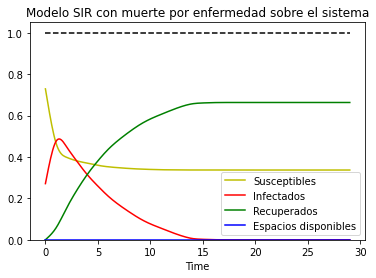

In [4]:
SIRmodel = medium_SIR_DD(alpha, beta, birth_rate, mortability_rates, ranges_dead_by_disease, 365, 0.2, 30, 100, spaceH, v, [1,0.0005,0.00025], ages)

SIRmodel.plotCurvesModel(f"Modelo SIR con muerte por enfermedad sobre el sistema", True)
#SIRmodel.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

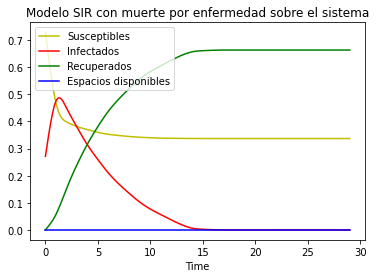

In [5]:
SIRmodel.plotCurvesModel(f"Modelo SIR con muerte por enfermedad sobre el sistema")

In [6]:
from EpidemiologicalModels.PlotsManager import *

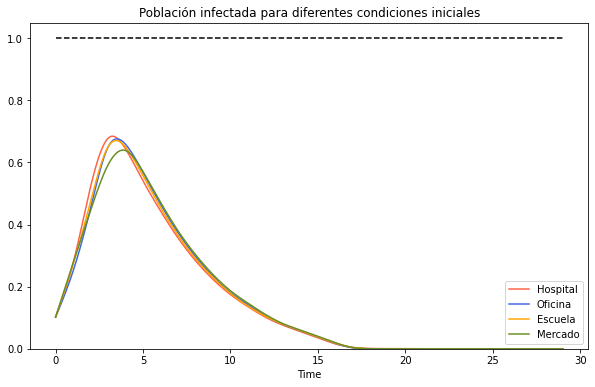

In [7]:
figsize(10,6)
# data[1] corresponde al número de infectados por iteración
plotSolutions([SIRmodelH.data[1],
               SIRmodelO.data[1],
               SIRmodelE.data[1],
               SIRmodelM.data[1]],
              ["Hospital","Oficina","Escuela","Mercado"], 
              ["tomato", "royalblue", "orange", "olivedrab"], 
              "Población infectada para diferentes condiciones iniciales")

In [7]:
from EpidemiologicalModels.SystemVisualization import *

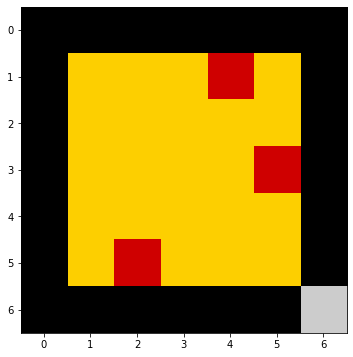

In [9]:
cs = CellSpace(5,5)
cs.system = statesH
SystemVisualization([cs]).evolutionsPlot(0)

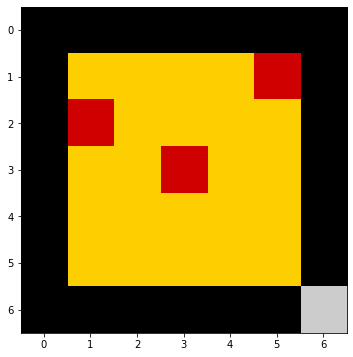

In [10]:
cs = CellSpace(5,5)
cs.system = statesO
SystemVisualization([cs]).evolutionsPlot(0)

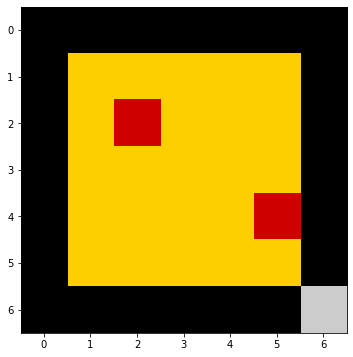

In [11]:
cs = CellSpace(5,5)
cs.system = statesE
SystemVisualization([cs]).evolutionsPlot(0)

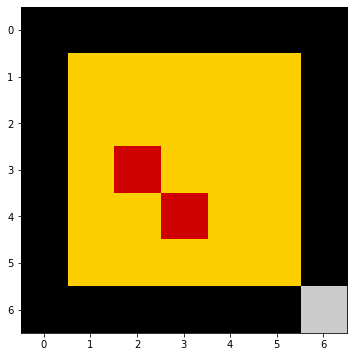

In [12]:
cs = CellSpace(5,5)
cs.system = statesM
SystemVisualization([cs]).evolutionsPlot(0)

In [8]:
from EpidemiologicalModels.NeighborhoodManager import *

In [9]:
mr = [[1,100,0.005]]
ranges_dead = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
br = 0.2

alpha = 0.2; beta = 0.5

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel1 = medium_SIR_DD(alpha, beta, br, mr, ranges_dead, 6, 0, 30, 100, spaceH, Moore(spaceH), [1,0.005,0.0025], ages)

# SIRmodel.plotMediumCurves(0.1, 100, 10, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
# SIRmodel1.plotMediumCurves(0,30,100,f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") # metricsPlot(30, ) 


In [35]:
SIRmodel1.data

[array([[0.00000000e+00, 7.97959184e-01],
        [1.00000000e+00, 4.18367347e-01],
        [2.00000000e+00, 1.36734694e-01],
        [3.00000000e+00, 4.89795918e-02],
        [4.00000000e+00, 1.83673469e-02],
        [5.00000000e+00, 4.08163265e-03],
        [6.00000000e+00, 0.00000000e+00],
        [7.00000000e+00, 0.00000000e+00],
        [8.00000000e+00, 0.00000000e+00],
        [9.00000000e+00, 0.00000000e+00],
        [1.00000000e+01, 0.00000000e+00],
        [1.10000000e+01, 0.00000000e+00],
        [1.20000000e+01, 4.08163265e-03],
        [1.30000000e+01, 4.08163265e-03],
        [1.40000000e+01, 4.08163265e-03],
        [1.50000000e+01, 4.08163265e-03],
        [1.60000000e+01, 4.08163265e-03],
        [1.70000000e+01, 4.08163265e-03],
        [1.80000000e+01, 4.08163265e-03],
        [1.90000000e+01, 4.08163265e-03],
        [2.00000000e+01, 4.08163265e-03],
        [2.10000000e+01, 4.08163265e-03],
        [2.20000000e+01, 4.08163265e-03],
        [2.30000000e+01, 4.0816326

In [10]:
mr = [[1,100,0.005]]
ranges_dead = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
br = 2

alpha = 0.2; beta = 0.5

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel2 = medium_SIR_DD(alpha, beta, br, mr, ranges_dead, 6, 0, 30, 100, spaceH, Von_Neumann(spaceH), [1,0.005,0.0025], ages)

#SIRmodel2.plotMediumCurves(0.1, 30, 100, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
# SIRmodel2.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

In [11]:
from EpidemiologicalModels.PlotsManager import *


In [53]:
figsize(8,4)

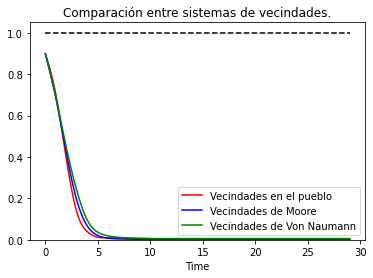

In [12]:
plotSolutions([SIRmodelH.data[0],SIRmodel1.data[0],SIRmodel2.data[0]],["Vecindades en el pueblo","Vecindades de Moore","Vecindades de Von Naumann"],["r","b","g"],"Comparación entre sistemas de vecindades.")

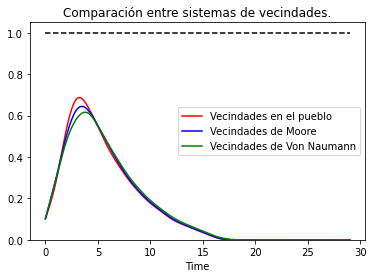

In [13]:
plotSolutions([SIRmodelH.data[1],SIRmodel1.data[1],SIRmodel2.data[1]],["Vecindades en el pueblo","Vecindades de Moore","Vecindades de Von Naumann"],["r","b","g"],"Comparación entre sistemas de vecindades.")

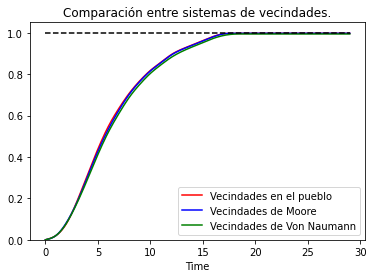

In [14]:
plotSolutions([SIRmodelH.data[2],SIRmodel1.data[2],SIRmodel2.data[2]],["Vecindades en el pueblo","Vecindades de Moore","Vecindades de Von Naumann"],["r","b","g"],"Comparación entre sistemas de vecindades.")

In [ ]:
mr = [[1,100,0.005]]
ranges_dead = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
br = 2

alpha = 0.2; beta = 0.5

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel3 = models(model, alpha, beta, states, v, [1,0.5,0.25])
SIRmodel3.birthRate = br; SIRmodel3.probabilityOfDyingByAgeGroup = mr
SIRmodel3.deathFromDiseaseByAgeRange = ranges_dead
SIRmodel3.systemAges = ages; SIRmodel3.annualUnit = 6

SIRmodel3.plotMediumCurves(0.1, 30, 100, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
#SIRmodel.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

In [ ]:
mr = [[1,100,0.005]]
ranges_dead = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
br = 2

alpha = 0.2; beta = 0.5

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel4 = models(model, alpha, beta, states, v, [0.5,0.25,0.125])
SIRmodel4.birthRate = br; SIRmodel4.probabilityOfDyingByAgeGroup = mr
SIRmodel4.deathFromDiseaseByAgeRange = ranges_dead
SIRmodel4.systemAges = ages; SIRmodel4.annualUnit = 6

SIRmodel4.plotMediumCurves(0.1, 30, 100, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
#SIRmodel.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

In [ ]:
mr = [[1,100,0.005]]
ranges_dead = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
br = 2

alpha = 0.2; beta = 0.5

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel5 = models(model, alpha, beta, states, v, [1,0.005,0.0025])
SIRmodel5.birthRate = br; SIRmodel5.probabilityOfDyingByAgeGroup = mr
SIRmodel5.deathFromDiseaseByAgeRange = ranges_dead
SIRmodel5.systemAges = ages; SIRmodel5.annualUnit = 6

SIRmodel5.plotMediumCurves(0.1, 30, 100, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
#SIRmodel.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

In [ ]:
mr = [[1,100,0.005]]
ranges_dead = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
br = 2

alpha = 0.2; beta = 0.5

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel6 = models(model, alpha, beta, states, v, [0.5,0.005,0.25])
SIRmodel6.birthRate = br; SIRmodel6.probabilityOfDyingByAgeGroup = mr
SIRmodel6.deathFromDiseaseByAgeRange = ranges_dead
SIRmodel6.systemAges = ages; SIRmodel6.annualUnit = 6

SIRmodel6.plotMediumCurves(0.1, 30, 100, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
#SIRmodel.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

In [ ]:
mr = [[1,100,0.005]]
ranges_dead = [[1,15,0.005],[16,48,0.01],[49,55,0.1],[56,100,0.2]]
br = 2

alpha = 0.2; beta = 0.5

model = "sir_deathByDisease"  # sis_deathByDisease, sir_deathByDisease
SIRmodel7 = models(model, alpha, beta, states, v, [0.5,0.005,0.0025])
SIRmodel7.birthRate = br; SIRmodel7.probabilityOfDyingByAgeGroup = mr
SIRmodel7.deathFromDiseaseByAgeRange = ranges_dead
SIRmodel7.systemAges = ages; SIRmodel7.annualUnit = 6

SIRmodel7.plotMediumCurves(0.1, 30, 100, f"Modelo {model[:3]} con muerte por enfermedad sobre el sistema")
#SIRmodel.metricsPlot(30, f"Modelo {model[:3]} con natalidad y mortalidad sobre el sistema") 

In [ ]:
SIRmodel.evolutionsPlot(30,0)

In [ ]:
SIRmodel.evolutionsPlot(30,1)

In [ ]:
SIRmodel.evolutionsPlot(30,2)

In [ ]:
SIRmodel.evolutionsPlot(30,3)

In [ ]:
SIRmodel.evolutionsPlot(30,4)

In [ ]:
SIRmodel.evolutionsPlot(30,5)

In [ ]:
SIRmodel.evolutionsPlot(30,6)

In [ ]:
SIRmodel.evolutionsPlot(30,7)

In [ ]:
SIRmodel.evolutionsPlot(30,8)

In [ ]:
SIRmodel.evolutionsPlot(30,9)

In [ ]:
SIRmodel.evolutionsPlot(30,10)

In [ ]:
SIRmodel.evolutionsPlot(30,11)

In [ ]:
SIRmodel.evolutionsPlot(30,12)

In [ ]:
SIRmodel.evolutionsPlot(30,13)

In [ ]:
SIRmodel.evolutionsPlot(30,14)

In [ ]:
SIRmodel.evolutionsPlot(30,15)

In [ ]:
SIRmodel.evolutionsPlot(30,16)

In [ ]:
SIRmodel.evolutionsPlot(30,17)

In [ ]:
SIRmodel.evolutionsPlot(30,18)

In [ ]:
SIRmodel.evolutionsPlot(30,19)

In [ ]:
SIRmodel.evolutionsPlot(30,20)

In [ ]:
SIRmodel.evolutionsPlot(30,21)

In [ ]:
SIRmodel.evolutionsPlot(30,22)

In [ ]:
SIRmodel.evolutionsPlot(30,23)

In [ ]:
SIRmodel.evolutionsPlot(30,24)

In [ ]:
SIRmodel.evolutionsPlot(30,25)

In [ ]:
SIRmodel.evolutionsPlot(30,26)

In [ ]:
SIRmodel.evolutionsPlot(30,27)

In [ ]:
SIRmodel.evolutionsPlot(30,28)

In [ ]:
SIRmodel.evolutionsPlot(30,29)